# Identifying Real Disaster Tweets on Social Media

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

In [70]:
# Load The Dataset 
df = pd.read_csv(r"C:/Users/Asus/Desktop/Workspace/Project/socialmedia-disaster-tweets-DFE.csv", encoding='latin-1')
df.head(3)    

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN


In [71]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               10876 non-null  int64  
 1   _golden                10876 non-null  bool   
 2   _unit_state            10876 non-null  object 
 3   _trusted_judgments     10876 non-null  int64  
 4   _last_judgment_at      10792 non-null  object 
 5   choose_one             10876 non-null  object 
 6   choose_one:confidence  10876 non-null  float64
 7   choose_one_gold        87 non-null     object 
 8   keyword                10789 non-null  object 
 9   location               7238 non-null   object 
 10  text                   10876 non-null  object 
 11  tweetid                10876 non-null  float64
 12  userid                 10789 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           84
choose_one                   0
choose_one:confidence        0
choose_one_gold          10789
keyword                     87
location                  3638
text                         0
tweetid                      0
userid                      87
dtype: int64

# Exploratory Data Analysis (EDA)

In [72]:
# Drop irrelevant columns
drop_cols = ["_unit_id", "_golden", "_unit_state", "_last_judgment_at", 
             "choose_one_gold", "tweetid", "userid"]
df = df.drop(columns=drop_cols)

# Fill missing values
df["keyword"] = df["keyword"].fillna("unknown")
df["location"] = df["location"].fillna("unknown")

In [73]:
# 1. Dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _trusted_judgments     10876 non-null  int64  
 1   choose_one             10876 non-null  object 
 2   choose_one:confidence  10876 non-null  float64
 3   keyword                10876 non-null  object 
 4   location               10876 non-null  object 
 5   text                   10876 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 509.9+ KB
None



Target Distribution:
 choose_one
Not Relevant    6187
Relevant        4673
Can't Decide      16
Name: count, dtype: int64


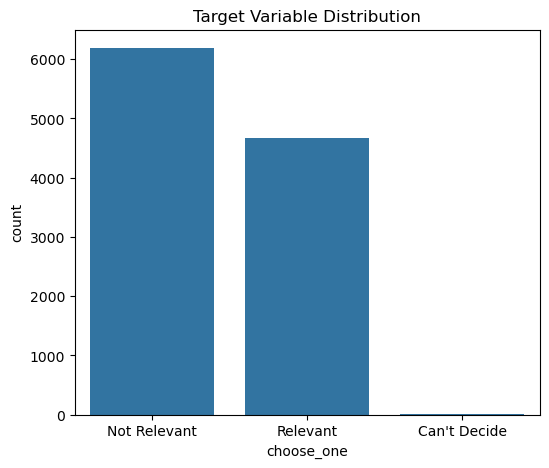

In [74]:
# 2. Target variable distribution
print("\nTarget Distribution:\n", df["choose_one"].value_counts())

# Target variable distribution
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="choose_one", order=df["choose_one"].value_counts().index)
plt.title("Target Variable Distribution")
plt.show()


Top 10 Keywords:
 keyword
unknown                87
ablaze                 50
accident               50
aftershock             50
airplane%20accident    50
ambulance              50
annihilated            50
annihilation           50
apocalypse             50
armageddon             50
Name: count, dtype: int64


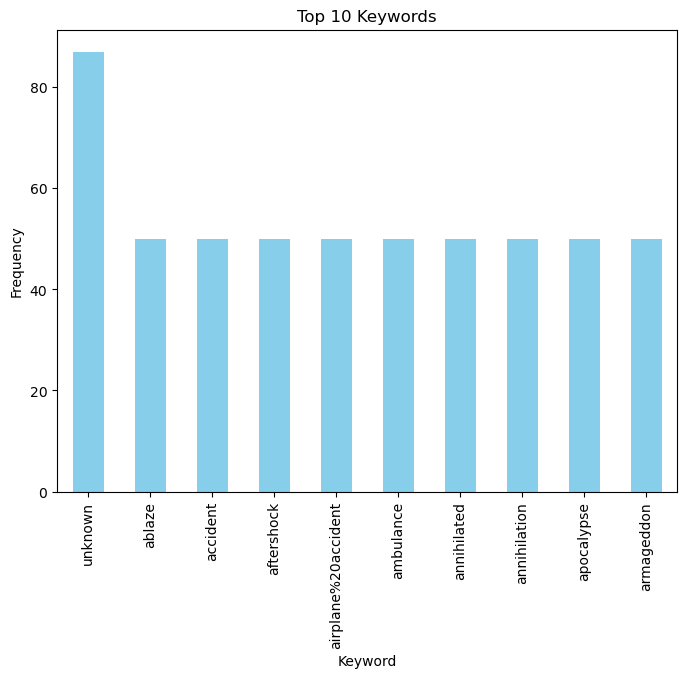

In [75]:
# 3. Top 10 keywords
print("\nTop 10 Keywords:\n", df["keyword"].value_counts().head(10))

# Top 10 Keywords
plt.figure(figsize=(8, 6))
df["keyword"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Keywords")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.show()


Top 10 Locations:
 location
unknown            3638
USA                 141
New York            109
United States        65
London               58
Canada               42
Nigeria              40
Worldwide            35
India                35
Los Angeles, CA      34
Name: count, dtype: int64


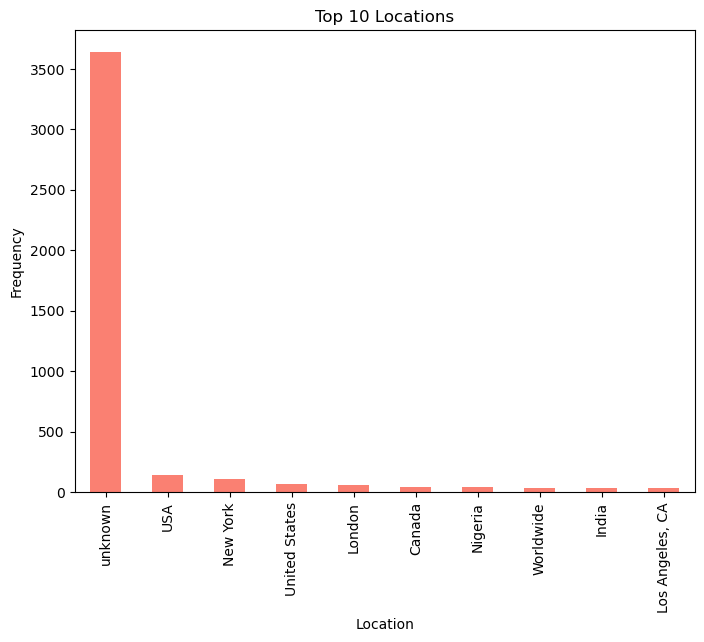

In [76]:
# 4. Top 10 locations
print("\nTop 10 Locations:\n", df["location"].value_counts().head(10))

# Top 10 Locations
plt.figure(figsize=(8, 6))
df["location"].value_counts().head(10).plot(kind="bar", color="salmon")
plt.title("Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.show()


Confidence Stats:
 count    10876.000000
mean         0.842037
std          0.168086
min          0.334200
25%          0.714900
50%          0.804900
75%          1.000000
max          1.000000
Name: choose_one:confidence, dtype: float64


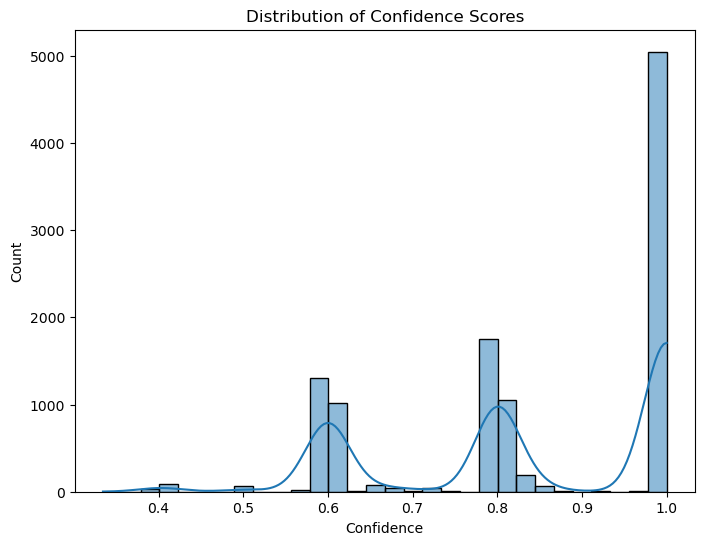

In [77]:
# 5. Confidence statistics
print("\nConfidence Stats:\n", df["choose_one:confidence"].describe())

# Distribution of Confidence Scores
plt.figure(figsize=(8, 6))
sns.histplot(df["choose_one:confidence"], bins=30, kde=True)
plt.title("Distribution of Confidence Scores")
plt.xlabel("Confidence")
plt.show()

# Data Transformation and Feature Selection

In [78]:
# 1. Encode categorical features
le_target = LabelEncoder()
df["target"] = le_target.fit_transform(df["choose_one"]) # encode labels

In [79]:
# Encode keyword and location
le_keyword = LabelEncoder()
df["keyword"] = le_keyword.fit_transform(df["keyword"])


le_location = LabelEncoder()
df["location"] = le_location.fit_transform(df["location"])

In [80]:
# 2. Select features
X = df[["keyword", "location", "choose_one:confidence"]]
y = df["target"]

In [81]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
# 3. Feature selection (keep top 2 features)
selector = SelectKBest(score_func=chi2, k=2)
X_selected = selector.fit_transform(abs(X_scaled), y)

In [83]:
# Show selected features
selected_features = X.columns[selector.get_support()].tolist()
print("Selected Features:", selected_features)

Selected Features: ['keyword', 'choose_one:confidence']


In [84]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [85]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _trusted_judgments     10876 non-null  int64  
 1   choose_one             10876 non-null  object 
 2   choose_one:confidence  10876 non-null  float64
 3   keyword                10876 non-null  int64  
 4   location               10876 non-null  int64  
 5   text                   10876 non-null  object 
 6   target                 10876 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 594.9+ KB


,_trusted_judgments,choose_one,choose_one:confidence,keyword,location,text,target
0,156,Relevant,1.0,206,4419,Just happened a terrible car crash,2
1,152,Relevant,1.0,206,4419,Our Deeds are the Reason of this #earthquake M...,2
2,137,Relevant,1.0,206,4419,"Heard about #earthquake is different cities, s...",2
